Twitter user @Caner_KMZ posted an [innocuous probability puzzle][1].
A good exercise to refreshen the old probability muscles.


[1]: https://twitter.com/Caner_KMZ/status/1285337178940354560

In [1]:
%display latex
var("s t")

(s, t)

Let `Fu` be the cdf of a uniform distribution on $[0,2]$.

In [2]:
Fu = t/2
Fu

1/2*t

Let `fu2` be the density of the square of a uniform on $[0,2]$.

$$ P(X^2 \leq t) = P(X \leq \sqrt(t)) = \sqrt{t}/2 $$

Thus the density on $[0,4]$ is

In [3]:
fu2 = diff(sqrt(t)/2, t)
fu2

1/4/sqrt(t)

The sum of two `fu2` distributed random vars is given by a convolution.
Let $s \in (0,4)$, then the density of the sum at $s$ is

In [4]:
forget()
assume(0 < s)
fsum0 = integral(fu2(s-t) * fu2(t), (t, 0, s))
fsum0

1/16*pi

If $4 < s < 8$, we get

In [5]:
forget()
assume(4 < s, s < 8)
fsum1 = integral(fu2(s-t) * fu2(t), (t, s-4, 4))
fsum1

-1/8*arctan(1/2*sqrt(s - 4)) + 1/8*arctan(2/sqrt(s - 4))

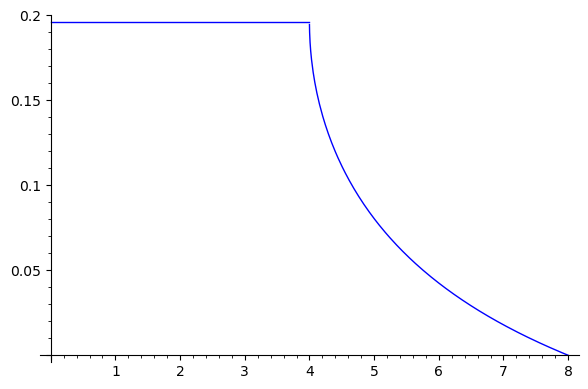

In [6]:
plot(fsum0, s, 0,4) + plot(fsum1, s, 4,8)

We can now compute the cdf of $X^2 + Y^2$.

In [7]:
F0 = integral(fsum0,(s,0,t))
F0

1/16*pi*t

In [8]:
forget()
assume(4 < t)
F1 = F0(4) + integral(fsum1,(s,4,t))
F1

1/4*pi - 1/8*t*(arctan(1/2*sqrt(t - 4)) - arctan(2/sqrt(t - 4))) + 1/2*sqrt(t - 4) - 1/2*arctan(1/2*sqrt(t - 4)) - 1/2*arctan(2/sqrt(t - 4))

In [9]:
forget()
plot(F0, (t, 0, 4)) + plot(F1, (t, 4, 8))

The pdf of $Z^2$ is a scaled version of the density of $X^2$.

We have $P(X^2 + Y^2 \leq Z^2) = E[F_{X^2+Y^2}(Z^2)]$.

In [10]:
fz2 = diff(sqrt(t)/4)
fz2

1/8/sqrt(t)

In [11]:
integral(fz2, (t, 0, 16))

1

In [12]:
integral(F0 * fz2, (t, 0, 4)) + integral(F1 * fz2, (t, 4, 8)) + integral(fz2, (t, 8, 16))

1/24*pi - 1/2*sqrt(2) + 1/64*integrate((2*pi - t*(arctan(1/2*sqrt(t - 4)) - arctan(2/sqrt(t - 4))) + 4*sqrt(t - 4) - 4*arctan(1/2*sqrt(t - 4)) - 4*arctan(2/sqrt(t - 4)))/sqrt(t), t, 4, 8) + 1

Wolfram Alpha simplifies the integral to

$$ \frac{8}{3}\left( 8\sqrt{2} - \pi - 4\sinh^{-1}(1)\right) $$

In [13]:
solution = pi/24 - 1/sqrt(2) + (1/64)*(8/3)*(8*sqrt(2) - pi - 4*asinh(1)) + 1
solution

-1/6*sqrt(2) - 1/6*arcsinh(1) + 1

In [14]:
float(solution)

0.6174021417678937